# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined = pd.merge(study_results,mouse_metadata,how="left")

# Display the data table for preview

combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(combined[combined.duplicated()]['Mouse ID'])

137    g989
Name: Mouse ID, dtype: object


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = combined.loc[(combined["Mouse ID"]=="g989"),:]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined = combined.drop(combined[combined["Mouse ID"]=="g989"].index)
combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
combined["Mouse ID"].nunique()

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [7]:
drugs = combined.groupby(["Drug Regimen"])
tumor_volume=drugs["Tumor Volume (mm3)"]
mean = tumor_volume.mean()
median = tumor_volume.median()
var = tumor_volume.var()
std = tumor_volume.std()
sem = tumor_volume.sem()
stats = {"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":var,
         "Tumor Volume Std. Dev.":std,"Tumor Volume Std. Err.":sem}
summary_stats=pd.DataFrame(stats)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_2=combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var","std","sem"])
summary_stats_2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

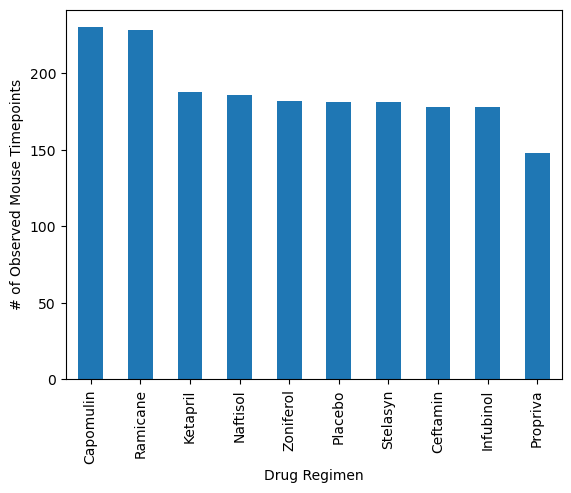

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = combined.groupby(["Drug Regimen"])["Mouse ID"].count()
drug_count = drug_count.sort_values(ascending=False)
drug_count.plot(kind='bar',ylabel="# of Observed Mouse Timepoints")
plt.show()


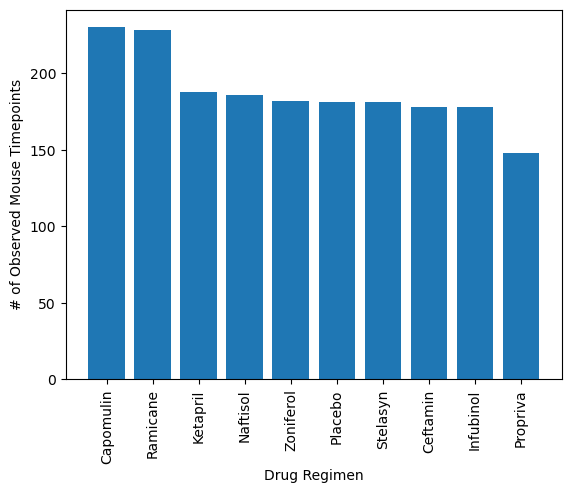

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = combined.groupby(["Drug Regimen"])["Mouse ID"].count()
drug_count = drug_count.sort_values(ascending=False)
plt.bar(drug_count.index,drug_count)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


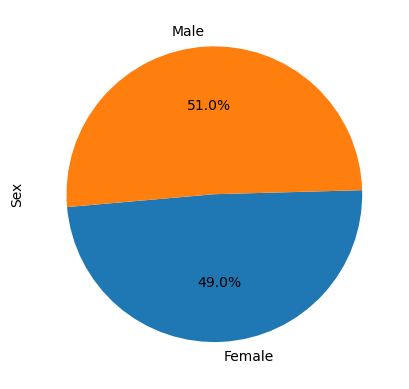

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_of_mice_count = combined.groupby(["Sex"])["Sex"].count()
sex_of_mice_count.plot(kind='pie',startangle=185,autopct="%1.1f%%")
plt.show()


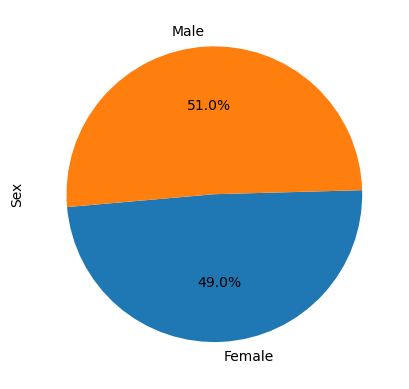

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_of_mice_count = combined.groupby(["Sex"])["Sex"].count()
plt.pie(sex_of_mice_count,labels=sex_of_mice_count.index,startangle=185,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined.groupby(['Mouse ID'])['Timepoint'].max()
df = pd.DataFrame({'Mouse ID':last_timepoint.index,'Timepoint':last_timepoint.values})

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_2 = pd.merge(df,combined,how="inner")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
outliers={}
tumor_vol=[]
IQR=[]
for i in treatments:
    data=combined_2.loc[(combined_2["Drug Regimen"]==i),:]
    tumor_vol.append(data["Tumor Volume (mm3)"])
    quartiles=data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    IQR.append(iqr)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determing potential outliers using lower and upper bounds
    outliers[i]=data.loc[(data["Tumor Volume (mm3)"]<lower_bound)\
                        |(data["Tumor Volume (mm3)"]>upper_bound)]\
                        ["Tumor Volume (mm3)"]
    
print(f"Capomulin's potential outliers are: {outliers['Capomulin'].values}")
print(f"Ramicane's potential outliers are: {outliers['Ramicane'].values}")
print(f"Infubinol's potential outliers are: {outliers['Infubinol'].values}")
print(f"Ceftamin's potential outliers are: {outliers['Ceftamin'].values}")
print(f"---------------------------------")
print(f"IQR for Capomulin tumor volumes are: {IQR[0]}")
print(f"IQR for Ramicane tumor volumes are: {IQR[1]}")
print(f"IQR for Infubinol tumor volumes are: {IQR[2]}")
print(f"IQR for Ceftamin tumor volumes are: {IQR[3]}")


Capomulin's potential outliers are: []
Ramicane's potential outliers are: []
Infubinol's potential outliers are: [36.3213458]
Ceftamin's potential outliers are: []
---------------------------------
IQR for Capomulin tumor volumes are: 7.781863460000004
IQR for Ramicane tumor volumes are: 9.098536719999998
IQR for Infubinol tumor volumes are: 11.477135160000003
IQR for Ceftamin tumor volumes are: 15.577752179999997


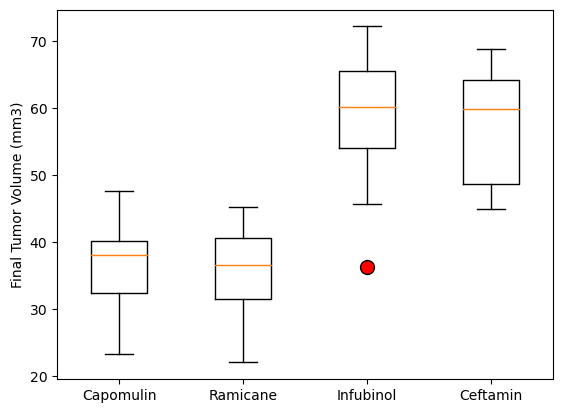

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.xticks([1, 2, 3, 4], treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

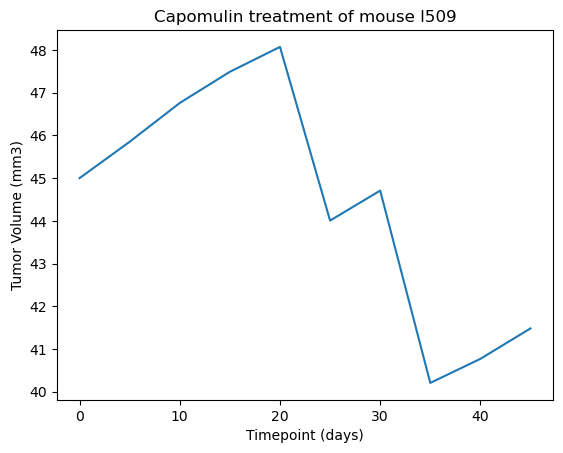

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_I509 = combined.loc[(combined["Mouse ID"]=="l509"),:]
plt.plot(mouse_I509["Timepoint"],mouse_I509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

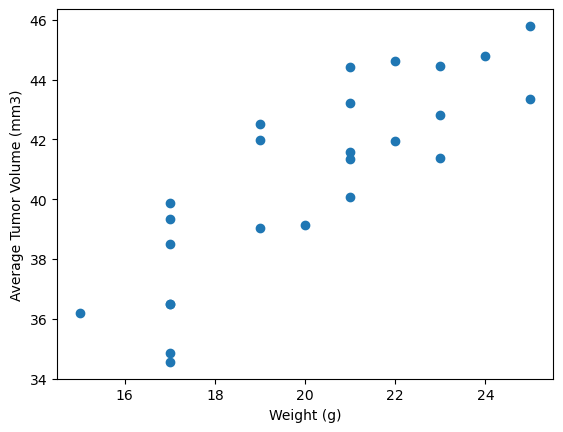

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = combined.loc[(combined["Drug Regimen"])=="Capomulin",:]
IDs = capomulin["Mouse ID"].unique()
averages = []
weights = []

# Determining average tumor volume for each mouse and appending to averages list along with mouse weights
for i in IDs:
    mouse = capomulin.loc[(capomulin["Mouse ID"]==i),:]
    averages.append(mouse["Tumor Volume (mm3)"].mean())
    weights.append(mouse["Weight (g)"].unique()[0])

# Plotting
plt.scatter(weights,averages)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


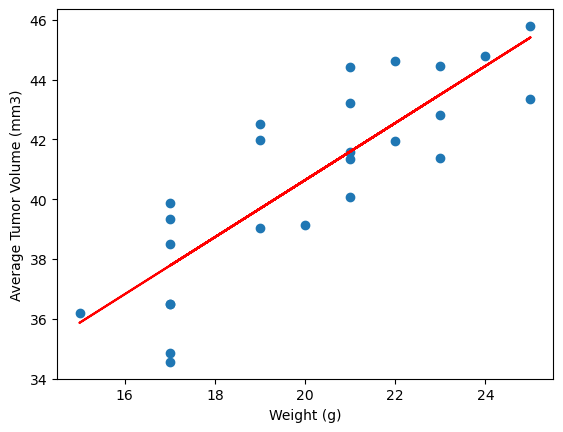

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, inter, r, p, std_err) = st.linregress(weights,averages)
fit = [(slope * i + inter) for i in weights]
plt.scatter(weights,averages)
plt.plot(weights,fit,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(r,2)}")
plt.show()